In [15]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display, HTML


DB = '../data/puzzler.db'

In [16]:
def load_sudokus(path):
    conn = sqlite3.connect(path)
    c = conn.cursor()
    #c.execute('SELECT * FROM "sudoku" LIMIT 0, 10;')
    c.execute('SELECT * FROM "sudoku";')
    data = c.fetchall()
    names = [member[0] for member in c.description]
    dic = {'Diabolical': 4, 'Hard': 3, 'Medium': 2, 'Easy': 1, 'Ultra Easy': 0}
    data_raw = np.array([row[3:] for row in data]) 
    dataset = {}
    dataset['data'] = data_raw[:,:10]
    dataset['data_cell'] = np.delete(data_raw, np.s_[1:10], 1)
    dataset['data_bool'] = np.clip(data_raw[:,:10], 0, 1)
    dataset['target'] = np.array([dic[name] for name in [row[2] for row in data]])
    dataset['target_names'] = np.array(['Ultra Easy', 'Easy', 'Medium', 'Hard', 'Diabolical'])
    dataset['feature_names'] = names[3:13]
    c.close()
    conn.close()
    return dataset

dataset = load_sudokus(DB)
#print the first 10 results
print(dataset['data'][:10])
print(dataset['data_cell'][:10])
print(dataset['data_bool'][:10])
print(dataset['target'][:10])
print(dataset['target_names'])
print(dataset['feature_names'])


[[ 29 138  23   1   0   0   0   0   0   0]
 [ 31 124  23   0   0   0   0   0   0   0]
 [ 27 132  25   4   1   0   0   0   2   0]
 [ 28 127  27   0   1   0   0   3   0   0]
 [ 32  86  45   0   0   0   0   0   0   0]
 [ 31  95  54   0   0   0   0   0   0   0]
 [ 30 117  28   3   0   0   0   0   0   0]
 [ 32 116   0   0   0   0   0   0   0   0]
 [ 28 120  39   0   0   0   0   3   0   0]
 [ 28 111  46   1   3   0   0   0   0   0]]
[[29 35 15  2  0  0  0  0  0  0]
 [31 37 13  0  0  0  0  0  0  0]
 [27 23 10 11  3  0  0  0  7  0]
 [28 35 11  0  3  0  0  4  0  0]
 [32 23 26  0  0  0  0  0  0  0]
 [31 23 27  0  0  0  0  0  0  0]
 [30 32 13  6  0  0  0  0  0  0]
 [32 49  0  0  0  0  0  0  0  0]
 [28 26 23  0  0  0  0  4  0  0]
 [28 17 29  3  4  0  0  0  0  0]]
[[1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 1 0]
 [1 1 1 0 1 0 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 0]]
[3 2 4 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (2077, 10)
y_train shape: (2077,)


In [19]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (693, 10)
y_test shape: (693,)


# KNN Classifier for 'data'

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 2 2 3 0 1 1 1 3 2 4 3 3 4 3 3 2 0 3 2 2 2 0 1 3 2 1 3 3 3 3 2 2 3 1 2 3
 2 4 1 2 1 4 3 0 0 3 3 1 3 2 4 4 2 1 3 2 4 2 4 3 2 4 3 0 2 4 2 4 0 3 2 3 2
 2 3 2 4 2 4 3 1 3 1 3 4 3 3 2 0 2 3 3 1 3 3 3 0 2 3 2 4 2 0 2 2 3 2 2 1 2
 4 3 2 4 2 3 4 2 0 2 1 3 2 2 3 2 3 3 4 0 4 2 0 2 3 0 3 3 3 3 2 4 2 2 1 2 3
 1 3 1 2 3 2 0 1 2 1 4 1 2 0 2 2 2 3 3 2 2 2 3 1 3 3 0 2 3 2 2 4 3 2 4 0 2
 3 3 3 1 0 3 2 2 3 2 2 4 0 0 3 2 4 4 4 2 4 0 2 2 2 3 1 1 4 0 4 2 2 2 0 3 0
 1 1 4 3 4 2 3 2 3 4 2 1 0 3 0 1 4 4 3 0 3 2 3 2 2 3 4 2 4 3 1 0 2 0 2 2 3
 3 3 1 3 3 2 3 1 0 1 1 2 3 1 3 1 0 3 3 2 2 2 3 4 1 4 2 4 3 2 0 3 0 1 3 2 1
 0 2 2 0 0 2 2 2 4 0 2 4 3 1 3 3 2 2 1 3 3 2 3 1 2 3 3 3 2 3 0 1 3 3 4 0 3
 1 3 3 2 3 2 3 0 4 2 3 2 2 2 3 2 4 3 3 2 0 4 3 3 1 3 3 1 3 1 4 2 4 3 3 0 2
 1 2 3 2 3 0 3 0 2 0 2 2 3 2 1 2 2 2 2 3 2 2 3 1 3 2 1 1 1 1 2 2 4 2 1 1 3
 2 4 2 0 2 1 3 2 4 0 4 2 3 3 1 1 0 2 0 2 2 2 2 0 3 2 0 3 4 4 3 2 3 3 0 1 0
 2 2 3 3 2 3 2 3 1 2 3 4 4 2 1 0 2 2 4 2 1 0 4 2 2 1 0 3 2 2 1 4 4 2 2 1 3
 0

In [23]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.85


In [24]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.85


In [25]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
#plot the results    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# KNN Classifier for 'data_cell'

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print(dataset['data_cell'])

Test set score: 0.90
[[29 35 15 ...,  0  0  0]
 [31 37 13 ...,  0  0  0]
 [27 23 10 ...,  0  7  0]
 ..., 
 [29 26 21 ...,  0  0  0]
 [29 32 10 ...,  0  0  0]
 [32 27 22 ...,  0  0  0]]


# KNN Classifier for 'data_bool'

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print(dataset['data_bool'])

Test set score: 0.79
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 1 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


# Desicion Tree Classifier for 'data'

In [28]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

#build the tree using the training data
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.915


In [29]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

In [30]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

'Source.gv.pdf'

# Feature Importance in trees

In [31]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.69835141  0.03719092  0.21480079  0.01141922  0.0052098   0.0030231   0.
  0.00857272  0.02143205  0.        ]


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

10


(-1, 10)

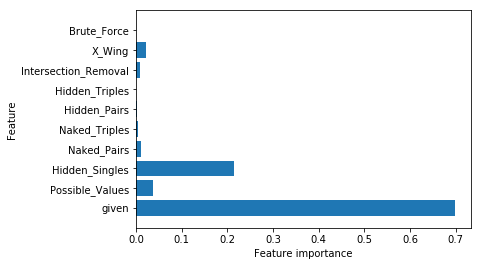

In [33]:
n_features = dataset['data'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

10


(-1, 10)

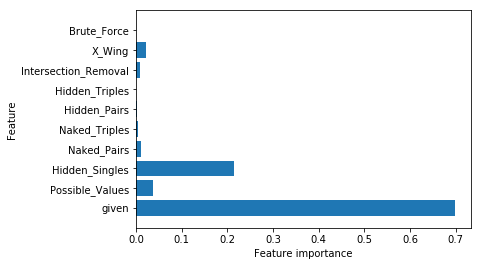

In [34]:
n_features = dataset['data_cell'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

10


(-1, 10)

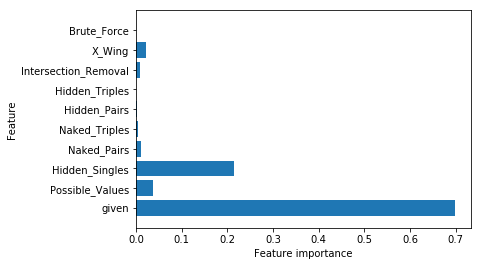

In [35]:
n_features = dataset['data_bool'].shape[1]
print(n_features)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dataset['feature_names'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Desicion Tree Classifier for 'data_cell'

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

#build the tree using the training data
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="tree.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

Accuracy on training set: 0.987
Accuracy on test set: 0.934


'Source.gv.pdf'

# Decision Tree Classifier on 'data_bool'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Print accuracy of the model
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.810
Accuracy on test set: 0.795


In [39]:
export_graphviz(tree, out_file="treeBool.dot", class_names=dataset['target_names'],
                feature_names=dataset['feature_names'], impurity=True, filled=True)

with open("treeBool.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render()

'Source.gv.pdf'

# Linear Regression

In [103]:
def avg_by_class(data, coef, intercept, target, labels):
    avgs = []
    for label in labels:
        avgs.append([0,0,label])
    for i in range(len(data)):
        dot = np.dot(data[i,:], coef)+intercept
        avgs[target[i]][0] += dot
        avgs[target[i]][1] += 1
    print("Average score by class:")
    for e in avgs:
        print("{}: {:.3f}".format(e[2], e[0]/e[1]))

def evaluate_regr(data, coef, intercept, target):
    count = 0;
    for i in range(len(data)):
        dot = np.dot(data[i,:], coef)+intercept
        if (int(round(dot)) == target[i]):
            count += 1
    return count/len(data)

In [107]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
print()
avg_by_class(dataset['data'], regr.coef_, regr.intercept_, dataset['target'], dataset['target_names'])
print()
print("Training set score: {:.3f}".format(evaluate_regr(X_train, regr.coef_, regr.intercept_, y_train)))
print("Test set score: {:.3f}".format(evaluate_regr(X_test, regr.coef_, regr.intercept_, y_test)))

Coefficients: 
 [-0.31564061  0.00595505  0.0102608   0.02995759  0.03746034  0.09550099
  0.26383384  0.02606311  0.265347    0.0497289 ]
Intercept: 
 11.0874694522
Mean squared error: 0.07
Variance score: 0.95

Average score by class:
Ultra Easy: 0.127
Easy: 0.977
Medium: 1.964
Hard: 3.094
Diabolical: 3.729

Training set score: 0.914
Test set score: 0.935


In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
print()
avg_by_class(dataset['data'], regr.coef_, regr.intercept_, dataset['target'], dataset['target_names'])
print()
print("Training set score: {:.3f}".format(evaluate_regr(X_train, regr.coef_, regr.intercept_, y_train)))
print("Test set score: {:.3f}".format(evaluate_regr(X_test, regr.coef_, regr.intercept_, y_test)))

Coefficients: 
 [-0.36095865 -0.00848647  0.00533652  0.00313647  0.00692632  0.03040368
  0.18923609  0.00845493  0.10049982  0.02545128]
Mean squared error: 0.08
Variance score: 0.95
Coefficients: 
 [-0.36095865 -0.00848647  0.00533652  0.00313647  0.00692632  0.03040368
  0.18923609  0.00845493  0.10049982  0.02545128]
Intercept: 
 13.6770522158
Mean squared error: 0.08
Variance score: 0.95

Average score by class:
Ultra Easy: -0.249
Easy: 0.499
Medium: 1.357
Hard: 2.328
Diabolical: 2.780

Training set score: 0.913
Test set score: 0.925


In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
print()
avg_by_class(dataset['data'], regr.coef_, regr.intercept_, dataset['target'], dataset['target_names'])
print()
print("Training set score: {:.3f}".format(evaluate_regr(X_train, regr.coef_, regr.intercept_, y_train)))
print("Test set score: {:.3f}".format(evaluate_regr(X_test, regr.coef_, regr.intercept_, y_test)))

Coefficients: 
 [  0.00000000e+00  -3.33066907e-16   1.82402212e+00   9.78351534e-01
   3.43533682e-01   1.66039508e-01   4.40078144e-01   5.62764890e-01
   8.76335610e-01   5.03214665e-01]
Mean squared error: 0.23
Variance score: 0.85
Coefficients: 
 [  0.00000000e+00  -3.33066907e-16   1.82402212e+00   9.78351534e-01
   3.43533682e-01   1.66039508e-01   4.40078144e-01   5.62764890e-01
   8.76335610e-01   5.03214665e-01]
Intercept: 
 0.0129449838188
Mean squared error: 0.23
Variance score: 0.85

Average score by class:
Ultra Easy: 0.147
Easy: 46.604
Medium: 54.401
Hard: 49.102
Diabolical: 53.859

Training set score: 0.723
Test set score: 0.704


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    dataset['data'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: -1567.62
Coefficients: 
 [[  5.31977330e-01  -1.40255190e-01  -6.35662327e-01  -3.05269974e-02
   -5.90499460e-03  -2.29039699e-03  -2.04296907e-05  -1.65871968e-02
   -2.33780382e-03  -2.63076471e-05]
 [  2.12646374e-01  -6.04550422e-02   5.57548115e-02  -1.62018814e+00
   -8.27767299e-01  -3.19249729e-01  -1.50745698e-03  -9.47824276e-01
   -7.34197462e-01  -2.62566775e-02]
 [ -4.37134846e-01   1.03601052e-01   1.16607605e-01  -7.35972253e+00
   -5.23739070e+00  -3.16822515e+00  -2.52386276e-03  -3.61268595e+00
   -4.97420046e+00  -1.21759029e+00]
 [ -4.98646812e-01   9.19303788e-02   4.63767360e-02   5.87451708e-01
    1.54053298e-01  -4.53573065e-01  -1.52921624e+00  -3.68498092e-03
   -3.48873651e+00  -3.01132621e-01]
 [ -7.70339473e-01   1.16870771e-01   9.14397255e-02   2.52779335e-01
    4.70441822e-01   6.96105880e-01   8.43806248e-01   3.70464021e-01
    3.02197205e+00   2.68329584e-01]]
Training set score: 0.906
Test set score: 0.887


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_cell'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: -509.18
Coefficients: 
 [[  5.94740558e-01  -3.72555066e-01  -1.36542029e+00  -5.53130675e-01
   -2.64959341e-01  -5.42717305e-02  -6.34531551e-05  -3.56050326e-01
   -7.37971270e-02  -1.10462679e-04]
 [  6.54619954e-01  -5.66131760e-01  -3.13096923e-01  -1.05299070e+00
   -7.59951048e-01  -3.04660816e-01  -5.39980427e-03  -7.25041489e-01
   -5.48789236e-01  -5.48861496e-03]
 [ -8.38795005e-01   5.59290303e-01   6.61183708e-01  -6.04600658e+00
   -3.00291304e+00  -2.64155371e+00  -3.19655996e-04  -2.43473129e+00
   -3.34989679e+00  -1.02235645e+00]
 [ -8.04997325e-01   4.79661017e-01   4.38105019e-01   6.52129403e-01
    4.55758469e-01   1.91744657e-01  -6.94932515e-01   3.26266667e-01
   -1.12595605e+00   2.54505794e-02]
 [ -2.40531407e+00   1.26025987e+00   1.26726373e+00   1.26395752e+00
    1.32038657e+00   1.52630645e+00   9.18673788e-01   1.31009685e+00
    2.10556843e+00   7.31462807e-01]]
Training set score: 0.918
Test set score: 0.908


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset['data_bool'], dataset['target'], random_state=0)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
logreg = LogisticRegression().fit(X_train, y_train)
print('Coefficients: \n', logreg.coef_)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Variance score: 0.85
Coefficients: 
 [[ 1.09384391  1.09384391 -8.09490863 -1.21842394 -0.45377038 -0.12764526
  -0.00849359 -0.63920678 -0.36774992 -0.01916749]
 [-1.3340826  -1.3340826   3.21696407 -3.79234921 -2.11344918 -0.91197822
  -0.01169525 -2.47483701 -1.72074007 -0.29283466]
 [-1.31665986 -1.31665986  4.52040574 -4.86905548 -2.77769303 -1.52855491
  -0.0148064  -2.8203599  -2.28067775 -0.56481349]
 [-1.41289883 -1.41289883  1.98124289  3.87410139  1.25448027 -0.75600407
  -1.46297125  0.76499112 -4.8248062   0.39633502]
 [-1.63370377 -1.63370377  0.6509738   0.87470194  1.01131379  0.95380788
   1.0238643   2.08829714  4.79055414  0.44499335]]
Training set score: 0.806
Test set score: 0.791
